In [1]:
import charts_function_list
import os

In [2]:
_,data,outputs = charts_function_list.folder_setup()
os.chdir(data)
lil = pd.read_csv('lil.csv')

In [3]:
#drop rappers with no value
lil_with_height =lil.dropna().reset_index(drop=True)

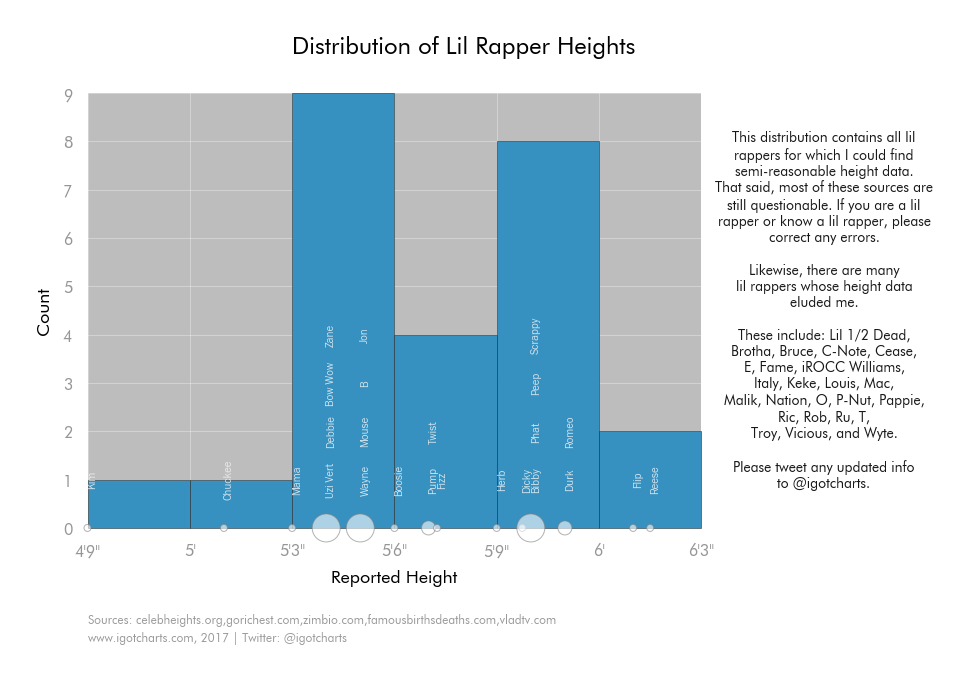

In [4]:
label_color='#f7f7f7'
plt.rcParams["font.family"] = 'Futura Bk BT'
lil_hist = charts_function_list.chart_maker()
fig = lil_hist.initial_fig_axis()
fig.suptitle('Distribution of Lil Rapper Heights', size=24,x=.6)
ax = lil_hist.axes_set_up(fig)
hist = plt.hist(lil_with_height['Total Inches'],bins=[57+3*x for x in range(7)],color='#3690c0',edgecolor='#252525',linewidth=.5,zorder=2,clip_on=False)
height_count = lil_with_height['Total Inches'].value_counts().sort_index()

plt.scatter(height_count.index,[0 for x in range(len(height_count))],zorder=3,color='white',alpha=.6,
            edgecolor='grey',clip_on=False,s=(height_count.values*7)**2)

lil_hist.tick_params_(ax,pad=15)
lil_hist.x_axis_setup(ax,min_=57,max_=75)
lil_hist.y_axis_setup(ax,min_=0,max_=9)
ax.set_xticks([57+(3*x) for x in range(7)])
ax.set_xticklabels(['4\'9"','5\'','5\'3"','5\'6"','5\'9"','6\'','6\'3"'])
ax.grid(alpha=.4,color='white')
ax.set_ylabel('Count',size=18)
ax.set_xlabel('Reported Height',size=18)

#set as multi index for labels
multi = lil_with_height.set_index(['Total Inches','Name'])

for item in multi.index.get_level_values(0).drop_duplicates():
    for i,v in enumerate(multi.iloc[multi.index.get_level_values(0)==item].reset_index()['Name']):
        ax.text(item,i+1,v,ha='left',va='center',color=label_color,fontname='Franklin Gothic Book',size=11,
                rotation=90,alpha=.8,zorder=5)
        
ax.text(1.2,.5,'This distribution contains all lil\nrappers for which I could find\nsemi-reasonable height data.\nThat said,\
 most of these sources are\nstill questionable. If you are a lil\nrapper or know a lil rapper, please\ncorrect any errors.\n\nLikewise, there are\
 many\nlil rappers whose height data\neluded me.\n\nThese include: Lil 1/2 Dead,\nBrotha, Bruce, C-Note,\
 Cease,\nE, Fame, iROCC Williams,\nItaly, Keke, Louis, Mac,\nMalik, Nation, O, P-Nut, Pappie,\nRic, Rob, Ru, T,\nTroy,\
 Vicious, and Wyte.\n\nPlease tweet any updated info\nto @igotcharts.',va='center',ha='center',size=14,alpha=.9,transform=ax.transAxes)
        
lil_hist.patch_adder(ax,facecolor='#bdbdbd')
lil_hist.citations(ax,source_y=-.22,chart_tag_y=-.26,fontsize=12,
                   source='Sources: celebheights.org,gorichest.com,zimbio.com,famousbirthsdeaths.com,vladtv.com')
os.chdir(outputs)
charts_function_list.chart_save('lil_rappers')
plt.show()